In [14]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
num_features = 2
num_classes = 3
num_samples = 500
X,y = make_blobs(n_samples = num_samples,n_features = num_features,centers = num_classes)
data = pd.DataFrame(dict(x = X[:,0], y= X[:,1],label = y))
print(data)

             x         y  label
0   -10.591336  2.954169      1
1   -10.267583  3.020490      1
2    -2.775672 -2.596648      0
3    -6.720597  2.414252      1
4    -9.334606  4.203291      1
..         ...       ...    ...
495  -4.675654 -1.721793      0
496   5.363080 -2.549228      2
497  -8.115307  2.349058      1
498  -4.345564 -0.611652      0
499  -3.637960 -1.812289      0

[500 rows x 3 columns]


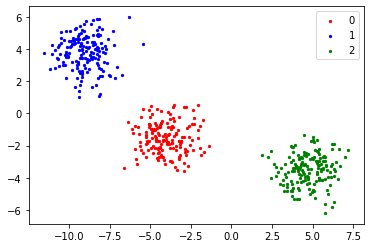

In [3]:
colors = ['r','b','g']
fig, ax = plt.subplots()
for key,group in data.groupby('label'):
    ax.scatter(group.x,group.y,c = colors[key],label = key,s=5)
ax.legend()

In [11]:
phi = np.ones([num_classes,1])/num_classes
iterations = 50
means = np.random.randint(np.min(X),np.max(X),[num_classes,num_features])
w = np.zeros([num_samples,num_classes])

In [5]:
cov = []
for i in range(num_classes):
  cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)

In [6]:
def findSum(i):
    s = 0
    for j in range(num_classes):
        s += (multivariate_normal(mean = means[j],cov = cov[j]).pdf(X[i])*phi[j])
    return s

In [7]:
def findMean(j):
    output = np.sum(w[:,j,None]*X,axis = 0)
    output /= np.sum(w[:,j])
    return output

In [8]:
def findSigma(j):
    output = np.sum(np.einsum('ijk,ijk->ikj',(X-means[2])[:,None],np.transpose((X-means[2])[:,None],(0,2,1)))*w[:,j,None,None],axis=0)
    output /= np.sum(w[:,j])
    return output

In [12]:
for i in tqdm(range(iterations)):
    #E-step
    for i in range(num_samples):
        for j in range(num_classes):
            n = multivariate_normal.pdf(x=X[i],mean = means[j], cov = cov[j])
            p = phi[j]
            w[i,j] = n*p /findSum(i)
    
    #M-step
    phi = (np.sum(w,axis = 0)/num_samples).reshape(w.shape[1],1)
    for j in range(num_classes):
        means[j] = findMean(j)
        cov[j] = findSigma(j)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:41<00:00,  1.22it/s]


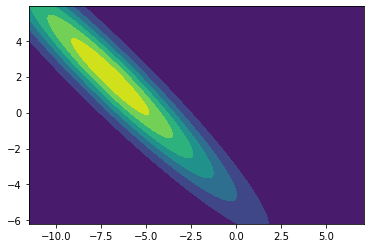

In [59]:
k=1
x, y = np.mgrid[np.min(X[:,0]):np.max(X[:,0]):0.1,np.min(X[:,1]):np.max(X[:,1]):0.1]
pos = np.dstack((x, y))
rv = multivariate_normal(means[k], cov[k])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))